In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
import matplotlib.pyplot as plt

In [47]:
credito = pd.read_csv("../data/credit3.csv", sep=";")

credito.head()

# class 1 = good, class 2 = bad

,ID,checking_status,credit_history,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,class
0,1,<0,critical/other existing credit,6,1169,4,4,67,2,1,1
1,2,0<=X<200,existing paid,48,5951,2,2,22,1,1,0
2,3,no checking,critical/other existing credit,12,2096,2,3,49,1,2,1
3,4,<0,existing paid,42,7882,2,4,45,1,2,1
4,5,<0,delayed previously,24,4870,3,4,53,2,2,0


In [48]:
# 1. Quantas instâncias e atributos existem, respectivamente?
credito.groupby(["class"])["class"].count()

# Classe está desbalanceada

class
0    300
1    700
Name: class, dtype: int64

In [49]:
previsores = credito.iloc[:, 1:10].values

classe = credito.iloc[:, 10].values

In [50]:
labelEncoder = LabelEncoder()

previsores[:, 0] = labelEncoder.fit_transform(previsores[:, 0])
previsores[:, 1] = labelEncoder.fit_transform(previsores[:, 1])

In [51]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(
    previsores, classe, test_size=0.3, random_state=123
)

In [52]:
randomForest = RandomForestClassifier(n_estimators=100)

randomForest.fit(X_treinamento, y_treinamento)

RandomForestClassifier()

In [53]:
previsao = randomForest.predict(X_teste)

confusao = confusion_matrix(y_teste, previsao)

confusao

array([[ 43,  57],
       [ 22, 178]])

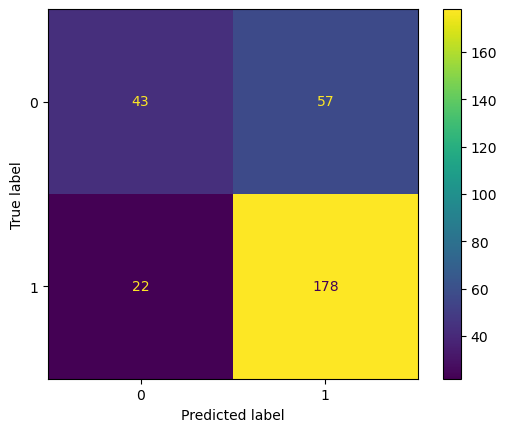

In [54]:
ConfusionMatrixDisplay.from_estimator(randomForest, X_teste, y_teste)

In [55]:
acuracia = accuracy_score(y_teste, previsao)

acuracia

0.7366666666666667

In [56]:
erro = 1 - acuracia

erro

0.2633333333333333

In [57]:
precisao = precision_score(y_teste, previsao)

precisao

0.7574468085106383

In [58]:
f1 = f1_score(y_teste, previsao)

f1

0.8183908045977012

In [59]:
auc = roc_auc_score(y_teste, previsao)

auc

0.6600000000000001

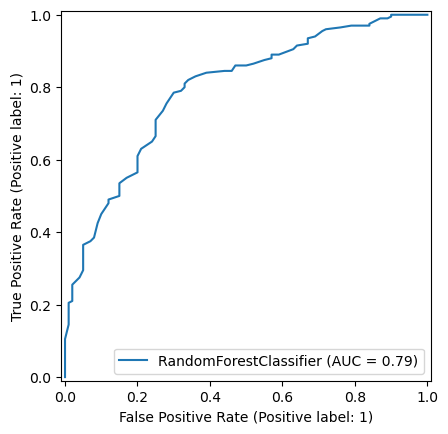

In [60]:
RocCurveDisplay.from_estimator(randomForest, X_teste, y_teste)

In [61]:
log = log_loss(y_teste, previsao)

log

9.491495392467517